In [17]:

import pandas as pd
import sys

sys.path.insert(1, '../rule_lib')

from rule_benchmark import *

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
FOLDERS = ["approach1", "approach2"]

In [20]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  51
Number of input variables:  4
Number of output variables:  3

approach1/:

Container_DataLayout:
	Test set:
		LinkedCells_SoA         :  16.67%	(4/24)
		VerletClusterLists_SoA  : 100.00%	(5/5)
		LinkedCells_AoS         :  88.89%	(16/18)
		PairwiseVerletLists_SoA :   0.00%	(0/1)
		VerletListsCells_SoA    :   0.00%	(0/4)
		VerletLists_AoS         :   0.00%	(0/1)
		VerletListsCells_AoS    :   0.00%	(0/3)
		VerletClusterLists_AoS  :   0.00%	(0/2)
		Total                   :  43.10%	(25/58)

	Train set:
		LinkedCells_SoA         :  19.74%	(15/76)
		VerletListsCells_AoS    :   0.00%	(0/13)
		LinkedCells_AoS         :  90.59%	(77/85)
		VerletClusterLists_SoA  : 100.00%	(21/21)
		VerletClusterLists_AoS  :   0.00%	(0/14)
		VerletListsCells_SoA    :   0.00%	(0/13)
		PairwiseVerletLists_AoS :   0.00%	(0/4)
		PairwiseVerletLists_SoA :   0.00%	(0/1)
		VerletLists_AoS         :   0.00%	(0/1)
		Total                   :  49.56%	(113/228)

Traversal:
	Test set:
		lc_c04_HCP       

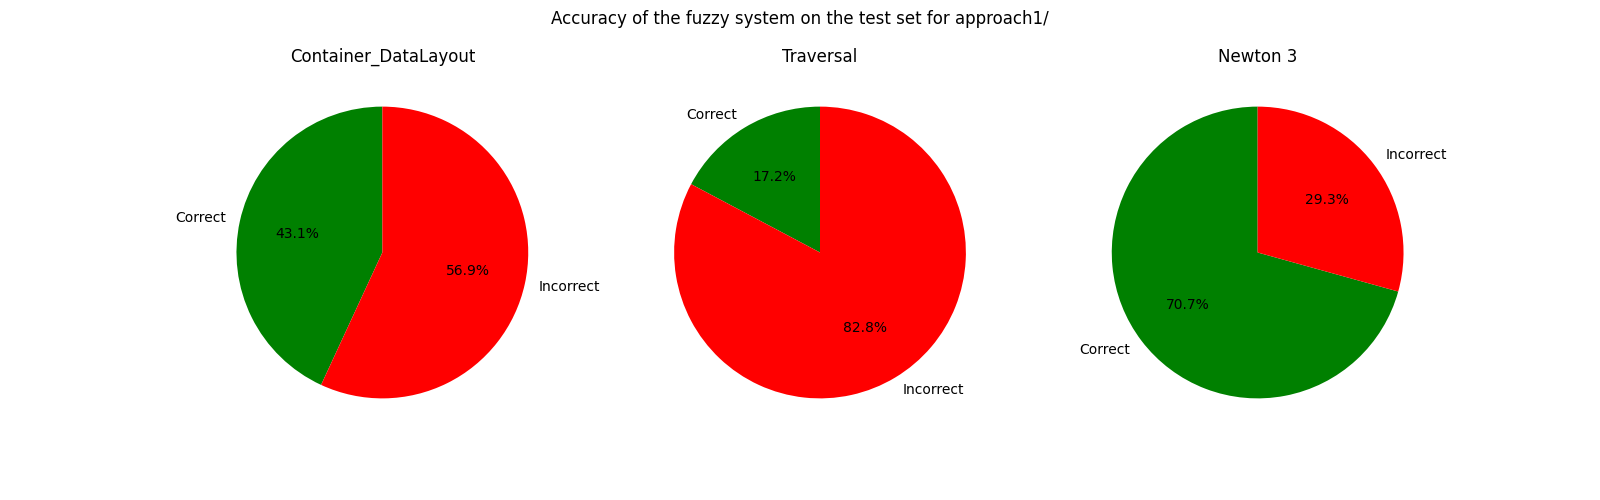

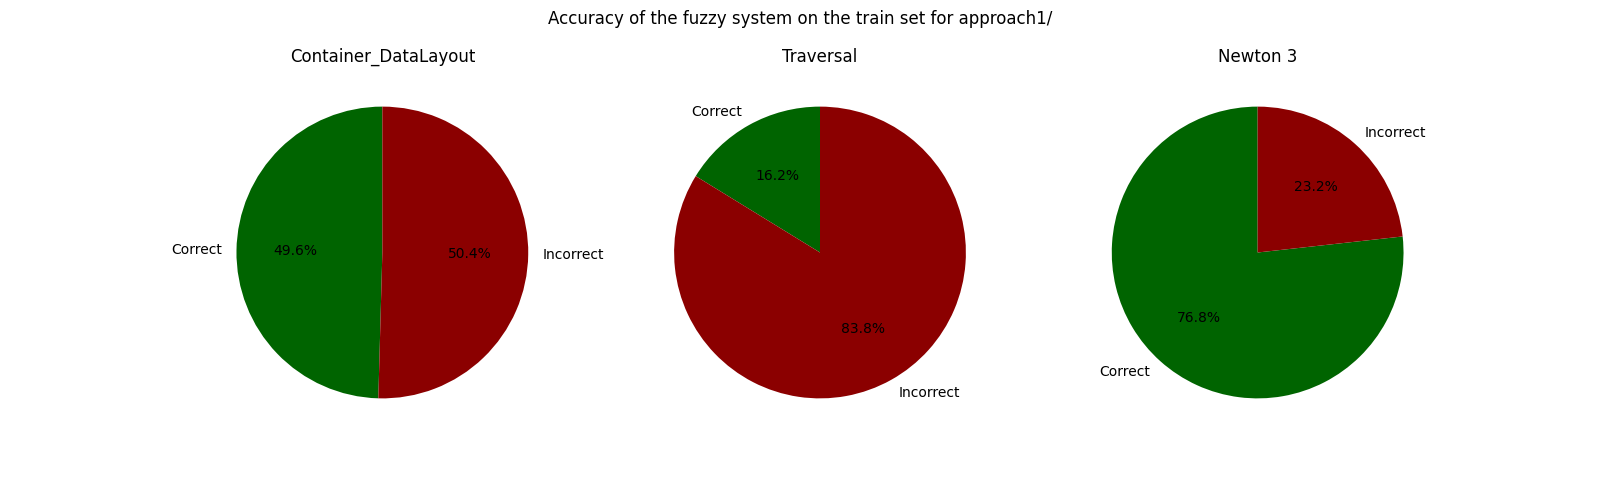

Number of rules:  51
Number of input variables:  4
Number of output variables:  3

approach2/:

Container_DataLayout:
	Test set:
		LinkedCells_SoA         :  16.67%	(4/24)
		VerletClusterLists_SoA  : 100.00%	(5/5)
		LinkedCells_AoS         :  88.89%	(16/18)
		PairwiseVerletLists_SoA :   0.00%	(0/1)
		VerletListsCells_SoA    :   0.00%	(0/4)
		VerletLists_AoS         :   0.00%	(0/1)
		VerletListsCells_AoS    :   0.00%	(0/3)
		VerletClusterLists_AoS  :   0.00%	(0/2)
		Total                   :  43.10%	(25/58)

	Train set:
		LinkedCells_SoA         :  19.74%	(15/76)
		VerletListsCells_AoS    :   0.00%	(0/13)
		LinkedCells_AoS         :  90.59%	(77/85)
		VerletClusterLists_SoA  : 100.00%	(21/21)
		VerletClusterLists_AoS  :   0.00%	(0/14)
		VerletListsCells_SoA    :   0.00%	(0/13)
		PairwiseVerletLists_AoS :   0.00%	(0/4)
		PairwiseVerletLists_SoA :   0.00%	(0/1)
		VerletLists_AoS         :   0.00%	(0/1)
		Total                   :  49.56%	(113/228)

Traversal:
	Test set:
		lc_c04_HCP       

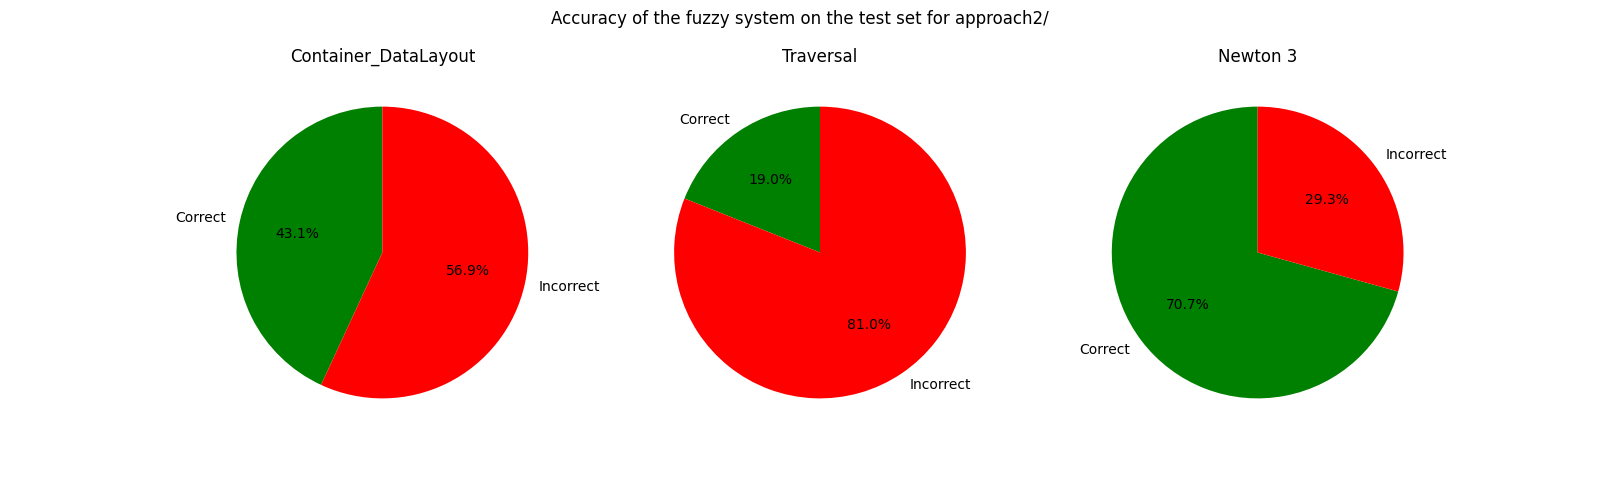

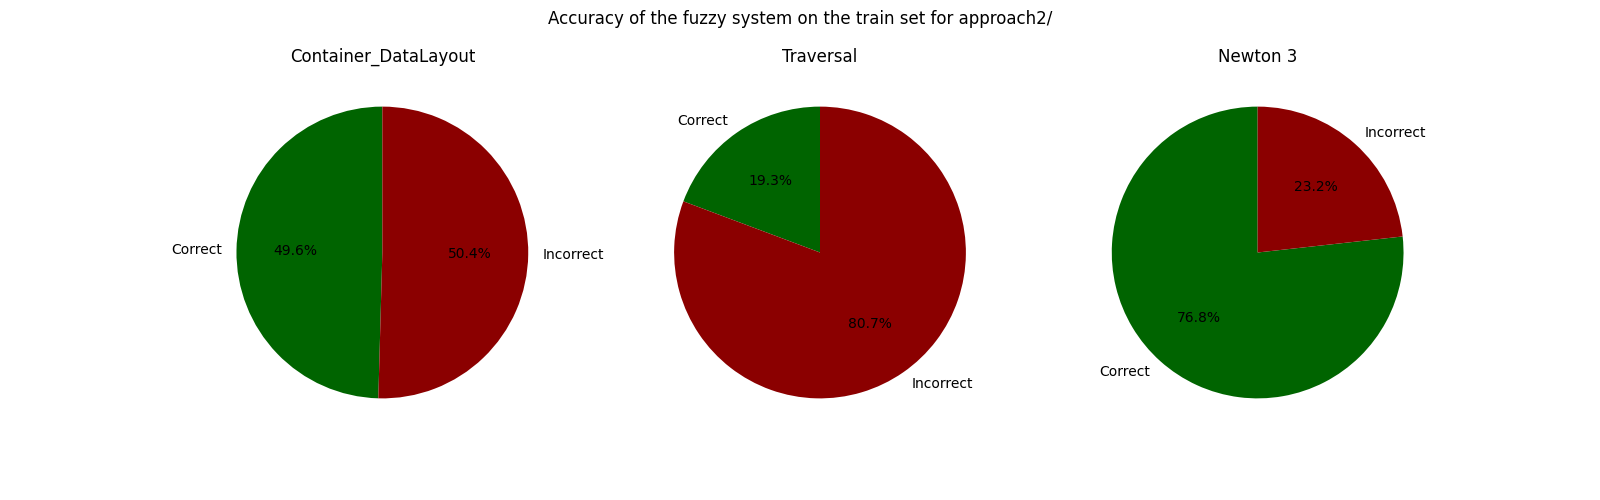

In [21]:
benchmark_rules("approach1/", train, test)
fiss, output_ranking = benchmark_rules("approach2/", train, test)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.